# Data Wrangling Template

In [1]:
import pandas as pd
import numpy as np
import requests
import json

## Gather

In [2]:
image_predictions = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [3]:
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(image_predictions.content)

In [4]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
image_prediction = pd.read_csv('image-predictions.tsv', sep = '\t')

In [5]:
with open('tweet-json.txt') as file:
    data = [json.loads(line) for line in file]

tweet_info = pd.DataFrame(data)
    
tweet_data = tweet_info[['id', 'retweet_count', 'favorite_count']]

## Assess

In [6]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
425,821421320206483457,NaN,NaN,2017-01-17 18:17:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sampson. He just gradua...,7.823059e+17,4.196984e+09,2016-10-01 19:47:08 +0000,https://twitter.com/dog_rates/status/782305867...,12,10,Sampson,doggo,None,None,None
1509,691459709405118465,NaN,NaN,2016-01-25 03:16:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Leo. He's a Fallopian Puffalope. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691459709...,12,10,Leo,None,None,None,None
2276,667443425659232256,NaN,NaN,2015-11-19 20:44:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Exotic dog here. Long neck. Weird paws. Obsess...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667443425...,6,10,None,None,None,None,None
312,835264098648616962,NaN,NaN,2017-02-24 23:04:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lola. Her hobbies include being precious ...,NaN,NaN,NaN,https://www.gofundme.com/lolas-life-saving-sur...,12,10,Lola,None,None,None,None
1684,681679526984871937,NaN,NaN,2015-12-29 03:33:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can you spot Toby the guilty pupper? 7/10 woul...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681679526...,7,10,None,None,None,pupper,None


In [8]:
twitter_archive.name.sort_values()

1035            Abby
1021            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
2238           Alfie
661            Alfie
367            Alfie
1616           Alfie
858            Alfie
51              Alfy
201            Alice
1701           Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
            ...     
852               my
988              not
335              not
1747      officially
1206             old
993              one
1936             one
924              one
369              one
2326           quite
169            quite
118            quite
193            quite
2030           space
22              such
2345             the
2346         

In [9]:
twitter_archive[~twitter_archive.name.str[0].str.isupper()].name.value_counts()

a               55
the              8
an               7
very             5
just             4
one              4
quite            4
mad              2
actually         2
not              2
getting          2
old              1
this             1
by               1
incredibly       1
my               1
space            1
his              1
unacceptable     1
light            1
life             1
such             1
infuriating      1
all              1
officially       1
Name: name, dtype: int64

In [10]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
twitter_archive[twitter_archive.rating_denominator == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [12]:
twitter_archive[twitter_archive.name == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885167619...,13,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805...,14,10,None,None,None,None,None


In [13]:
twitter_archive.source[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [14]:
twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [15]:
twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [16]:
twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [17]:
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [18]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
image_prediction.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1190,739844404073074688,https://pbs.twimg.com/media/CkR0jrhWYAALL5N.jpg,1,toy_poodle,0.342397,True,table_lamp,0.104451,False,miniature_poodle,0.079871,True
571,678399652199309312,https://pbs.twimg.com/ext_tw_video_thumb/67839...,1,swing,0.929196,False,Bedlington_terrier,0.015047,True,Great_Pyrenees,0.014039,True
973,706681918348251136,https://pbs.twimg.com/media/Cc6jcYRXIAAFuox.jpg,1,toy_poodle,0.717584,True,miniature_poodle,0.151433,True,Norwich_terrier,0.047087,True
790,690649993829576704,https://pbs.twimg.com/media/CZWugJsWYAIzVzJ.jpg,1,bighorn,0.215438,False,hyena,0.137928,False,Mexican_hairless,0.098171,True
734,686947101016735744,https://pbs.twimg.com/media/CYiGvn-UwAEe4wL.jpg,1,refrigerator,0.799795,False,medicine_chest,0.182538,False,ice_bear,0.001431,False


In [20]:
image_prediction[image_prediction.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [21]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [22]:
tweet_data.sample(5)

,id,retweet_count,favorite_count
708,785170936622350336,5639,13491
1198,716730379797970944,475,1339
867,761745352076779520,979,4707
1923,674063288070742018,2450,6769
376,828011680017821696,2451,11411


In [23]:
tweet_data.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


#### Quality
##### `Twitter Archive` table
- Redundant rows with retweeted_status_id information
- retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns
- Source contains extra html tag <a href=" and >Twitter for iPhone</a>
- Incorrect datatype for timestamp
- timestamp has +0000 at the bottom that is not needed
- Invalid names such as "the", "officially', "quite", ...
- Rating denominator is 0
- Name should be inputted as NaN instead of None
- Wrong datatype for doggo ,floofer, pupper and puppo columns
- in_reply_to_status_id and in_reply_to_user_id are float instead of string
- tweet_id should be string instead of integer
- rating_numerator and rating_denominator columns' datatype should be float instead of integer

#### Tidiness
- `Twitter Archive` table: One variable - Dog stage in four separate columns.
- `Image Prediction` table: Duplicate rows with exact same information.
- All three tables should be merged into one single final table.

## Clean

In [24]:
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_data_clean = tweet_data.copy()

### Tidiness

#### `Image Prediction` table have duplicate rows with exact same information.

#### Define

Find duplicate rows in `Image Prediction` table using duplicated() method and then drop them. 

#### Code

In [25]:
image_prediction_clean = image_prediction_clean[~image_prediction_clean.jpg_url.duplicated()]

#### Test

In [26]:
image_prediction_clean[image_prediction_clean.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### Tweet_id column in `twitter_archive` table being duplicated in `image_prediction` and `tweet_data` tables.

#### Define

Combine all three tables together into one single table named `twitter_archive` using merge() method, then drop id column as it is duplicated with tweet_id column.

#### Code

In [27]:
twitter_archive_clean = pd.merge(twitter_archive_clean, image_prediction_clean, on='tweet_id', how = 'left')

In [28]:
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_data_clean, left_on = 'tweet_id', right_on = 'id')

In [29]:
twitter_archive_clean = twitter_archive_clean.drop('id', axis = 1)

#### Test

In [30]:
twitter_archive_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461


#### - Dog_stage variable in 4 different columns in `twitter_archive` table
#### - `None` values in the four dog stages columns should be input as NaN

#### Define

- Using loc() method, replace all "None" strings in the doggo, floofer, pupper and puppo columns with empty ' ' value.


- Create a new column named `stage` which is the string concatenation of all four dog stages together.


- For tweets with more than one stage in the `stage` column, we will replace them all with 'multiple' string.


- For tweets with empty value in `stage` column, we will replace them with NaN value.


- Finally, `doggo`, `floofer`, `pupper` and `puppo` columns shall be dropped from `twitter_archive` dataframe as they are no longer needed.

#### Code

In [31]:
twitter_archive_clean.loc[twitter_archive_clean.doggo == "None", 'doggo'] = ''
twitter_archive_clean.loc[twitter_archive_clean.floofer == "None", 'floofer'] = ''
twitter_archive_clean.loc[twitter_archive_clean.pupper == "None", 'pupper'] = ''
twitter_archive_clean.loc[twitter_archive_clean.puppo == "None", 'puppo'] = ''

In [32]:
twitter_archive_clean['stage'] = twitter_archive_clean['doggo'] + twitter_archive_clean['floofer'] + twitter_archive_clean['pupper'] + twitter_archive_clean['puppo']

In [33]:
twitter_archive_clean.stage.value_counts()

                1975
pupper           244
doggo             83
puppo             29
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: stage, dtype: int64

In [34]:
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggopupper', 'stage'] = 'multiple'
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggofloofer', 'stage'] = 'multiple'
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggopuppo', 'stage'] = 'multiple'

In [35]:
twitter_archive_clean.loc[twitter_archive_clean.stage == '', 'stage'] = np.nan

In [36]:
twitter_archive_clean = twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

#### Test

In [37]:
twitter_archive_clean.stage.value_counts()

pupper      244
doggo        83
puppo        29
multiple     14
floofer       9
Name: stage, dtype: int64

### Quality

#### Remove rows that are retweets and not original tweets.

#### Define

Using isnull() method, only retain rows that contain null value in retweeted_status_user_id column of `twitter_archive` table.

#### Code

In [38]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_user_id.isnull()]

#### Test

In [39]:
twitter_archive_clean[twitter_archive_clean.retweeted_status_user_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,stage


#### `twitter_archive` table contains 'retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp' columns which are no longer needed.

#### Define

Drop the three above-mentioned columns from `twitter_archive` table using drop() method.

#### Code

In [40]:
twitter_archive_clean = twitter_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1)

#### Test

In [41]:
twitter_archive_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,False,bagel,0.085851,False,banana,0.076110,False,8853,39467,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,NaN


#### Extra +0000 string from each value in the timestamp column of `twitter_archive` table.

#### Define

Using python `str` method, only keep the first part of each string value in timestamp column that does not contain the +0000. 

#### Code

In [42]:
twitter_archive_clean.timestamp = twitter_archive_clean.timestamp.str[:-6]

#### Test

In [43]:
twitter_archive_clean.timestamp.head()

0    2017-08-01 16:23:56
1    2017-08-01 00:17:27
2    2017-07-31 00:18:03
3    2017-07-30 15:58:51
4    2017-07-29 16:00:24
Name: timestamp, dtype: object

#### Wrong datatype for timestamp column of `twitter_archive` table.

#### Define

Convert datatype of timestamp column to datetime using to_datetime() method.

#### Code

In [44]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

#### Test

In [45]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 24 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog                   1994 non-null object
p3                       1994 non-null object
p3_conf      

#### Invalid names such as 'the', 'actually', 'getting',... and 'None' in `name` column of `twitter_archive` table.

#### Define

Create a list contains all the invalid names that have been found in Assess section, then replace all those values with NaN.

#### Code

In [46]:
invalid_names = ['a', 'the', 'an', 'very', 'quite', 'just', 'one', 'not', 'actually', 'getting', 'mad',
                'light', 'life', 'by', 'my', 'incredibly', 'old', 'space', 'such', 'all', 'officially',
                'infuriating', 'this', 'his', 'unacceptable', 'None']
twitter_archive_clean.name = twitter_archive_clean.name.replace(invalid_names, np.nan)

#### Test

In [47]:
twitter_archive_clean.name.value_counts()

Charlie      11
Lucy         11
Oliver       10
Cooper       10
Penny         9
Tucker        9
Lola          8
Winston       8
Sadie         8
Daisy         7
Toby          7
Jax           6
Koda          6
Stanley       6
Oscar         6
Bo            6
Bella         6
Bailey        6
Louis         5
Dave          5
Leo           5
Bentley       5
Buddy         5
Scout         5
Milo          5
Chester       5
Rusty         5
Clark         4
Jack          4
Finn          4
             ..
Crumpet       1
Bonaparte     1
Blanket       1
Millie        1
William       1
Pavlov        1
Snicku        1
Schnitzel     1
Lucky         1
Cora          1
Filup         1
Tripp         1
Nigel         1
Willy         1
Chadrick      1
Jeremy        1
Kathmandu     1
Dobby         1
Obie          1
Lambeau       1
Leonard       1
Dylan         1
Jennifur      1
Evy           1
Edgar         1
Olaf          1
Barclay       1
Tuck          1
Mojo          1
Nico          1
Name: name, Length: 930,

#### `Source` column still contains html tags wrapping around the full urls and need to be removed.

#### Define

Extract the url from `source` column using extract() method.

#### Code

In [48]:
twitter_archive_clean.source = twitter_archive_clean.source.str.extract(r'href="([^"]+)', expand = True)

#### Test

In [49]:
twitter_archive_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,False,bagel,0.085851,False,banana,0.076110,False,8853,39467,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,NaN


#### A row in `twitter_archive` table has the invalid rating denominator value of zero.

#### Define

- https://twitter.com/dog_rates/status/835246439529840640


- Above is the full twitter url for this tweet. After reading its content, we can say for certain the correct values for rating numerator and rating denominator are 13 and 10 respectively.


- Using loc() method to locate the tweet in question within `twitter_archive` table, then replace both of them with the correct values.

#### Code

In [50]:
twitter_archive_clean[twitter_archive_clean.rating_denominator == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,stage
312,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03,http://twitter.com/download/iphone,@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,960,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83,2259,NaN


In [51]:
twitter_archive_clean.loc[9728, 'rating_numerator'] = 13
twitter_archive_clean.loc[9728, 'rating_denominator'] = 10

#### Test

In [52]:
twitter_archive_clean.loc[9728, ['rating_numerator', 'rating_denominator']]

rating_numerator      13
rating_denominator    10
Name: 9728, dtype: object

#### Wrong datatype for `in_reply_to_status_id` and `in_reply_to_user_id` columns, should be string instead of float.
#### `tweet_id` should be string instead of integer.
#### `rating_numerator` and `rating_denominator` should be float instead of integer.

#### Define

- Convert `in_reply_to_status_id` and `in_reply_to_user_id` into string using astype() method, then remove the '.0' tail from each value by string slicing. After that, replace all the 'n' values, which were previously NaN values that have been converted to string, to their original value of NaN.


- Use astype() method to convert `tweet_id`, `rating_numerator` and `rating_denominator` into correct datatypes.

#### Code

In [53]:
twitter_archive_clean.in_reply_to_status_id = twitter_archive_clean.in_reply_to_status_id.astype(str).str[:-2]
twitter_archive_clean.in_reply_to_status_id = twitter_archive_clean.in_reply_to_status_id.replace('n', np.nan)

In [54]:
twitter_archive_clean.in_reply_to_user_id = twitter_archive_clean.in_reply_to_user_id.astype(str).str[:-2]
twitter_archive_clean.in_reply_to_user_id = twitter_archive_clean.in_reply_to_user_id.replace('n', np.nan)

In [55]:
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.astype(float)
twitter_archive_clean.rating_denominator = twitter_archive_clean.rating_denominator.astype(float)

#### Test

In [56]:
twitter_archive_clean.in_reply_to_status_id.value_counts().head()

6.671521640794235e+    2
7.079800658926674e+    1
8.21152592717697e+     1
6.693543826270495e+    1
8.476061755961385e+    1
Name: in_reply_to_status_id, dtype: int64

In [57]:
twitter_archive_clean.in_reply_to_user_id.value_counts().head()

4196983835    47
21955058       2
3105440746     1
2894131180     1
20683724       1
Name: in_reply_to_user_id, dtype: int64

In [58]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2176 entries, 0 to 9728
Data columns (total 24 columns):
tweet_id                 2176 non-null object
in_reply_to_status_id    78 non-null object
in_reply_to_user_id      78 non-null object
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2176 non-null float64
rating_denominator       2176 non-null float64
name                     1391 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog                   1994 non-null object
p3                       1994 non-null object
p3_conf   

#### Wrong datatype for doggo ,floofer, pupper and puppo columns

- This issue has already been addressed and solved by removing all these four columns as above.

### Analyze and Visualize Data

In [59]:
twitter_archive_clean.groupby('stage')['favorite_count'].mean()

stage
doggo       17369.093333
floofer     11064.444444
multiple    15482.000000
pupper       7176.267857
puppo       20788.875000
Name: favorite_count, dtype: float64

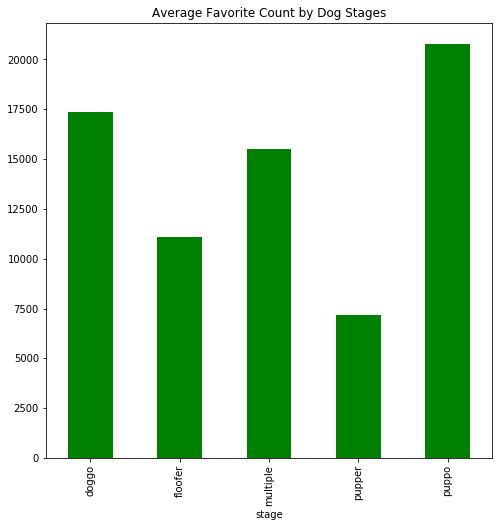

In [61]:
twitter_archive_clean.groupby('stage')['favorite_count'].mean().plot(kind = 'bar', 
                                                                         title = 'Average Favorite Count by Dog Stages',
                                                                        color = 'green',
                                                                        figsize = (8,8))

In [62]:
twitter_archive_clean.groupby('stage')['retweet_count'].mean()

stage
doggo       6348.786667
floofer     4155.888889
multiple    5195.083333
pupper      2457.723214
puppo       6332.500000
Name: retweet_count, dtype: float64

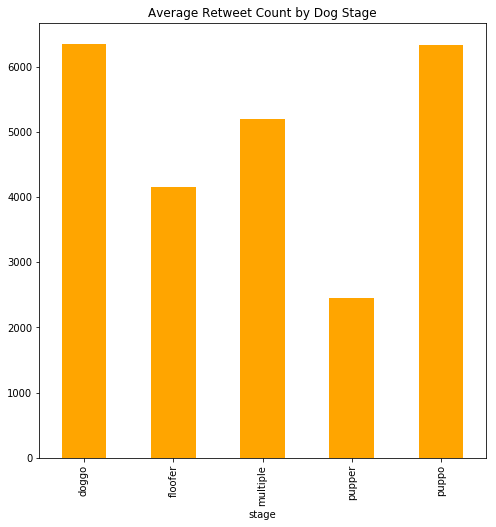

In [63]:
twitter_archive_clean.groupby('stage')['retweet_count'].mean().plot(kind = 'bar',
                                                                       title = 'Average Retweet Count by Dog Stage',
                                                                       color = 'orange',
                                                                       figsize = (8,8))

In [64]:
twitter_archive_clean['rating'] = twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator']

In [65]:
modified_twitter_clean = twitter_archive_clean[(twitter_archive_clean.p1_dog == True) & (twitter_archive_clean.p1_conf >= 0.75)]

In [66]:
modified_twitter_clean.groupby('p1')['rating'].mean().sort_values(ascending = False).head(10)

p1
clumber                    2.7
black-and-tan_coonhound    1.4
Gordon_setter              1.4
Leonberg                   1.3
briard                     1.3
malinois                   1.3
Afghan_hound               1.3
Siberian_husky             1.2
Cardigan                   1.2
toy_terrier                1.2
Name: rating, dtype: float64

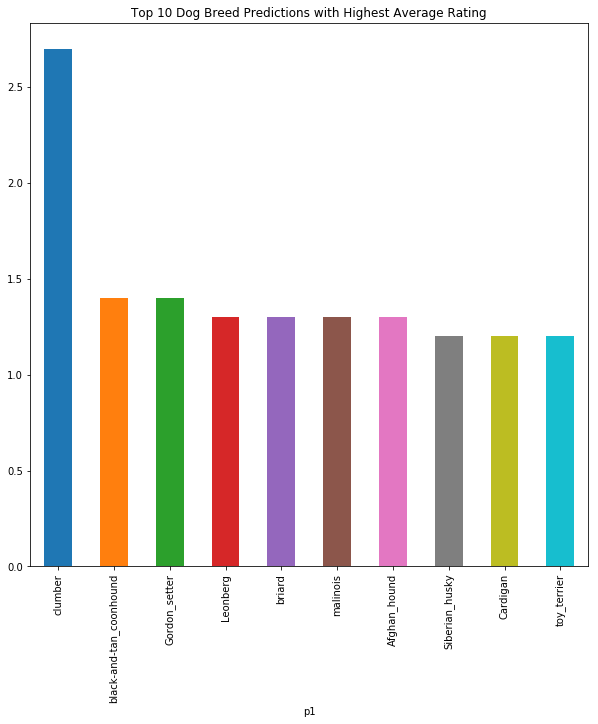

In [67]:
modified_twitter_clean.groupby('p1')['rating'].mean().sort_values(ascending = False).head(10).plot(kind = 'bar', 
                                                                                                   title = 'Top 10 Dog Breed Predictions with Highest Average Rating',
                                                                                                   figsize = (10,10))

### Store Data

In [72]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', index = False)